In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gen_poiss_proc(lamb, T):
    S = [0]
    I = 0
    t = 0
    while True:
        U = np.random.uniform(0, 1)
        t = t - np.log(U) / lamb
        if t < T:
            I += 1
            S.append(t)
        else:
            return S

In [3]:
def N_komp(S, T, lamb):
    p = np.asarray(S)
    n = np.zeros(len(T))
    for i in range(len(T)):
        n[i] = (p <= T[i]).sum() - lamb * T[i]
    return n

In [4]:
P1 = gen_poiss_proc(2, 10)
P2 = gen_poiss_proc(5, 10)
n1 = N_komp(P1, np.arange(0, 10, 0.1), 2)
n2 = N_komp(P2, np.arange(0, 10, 0.1), 5)

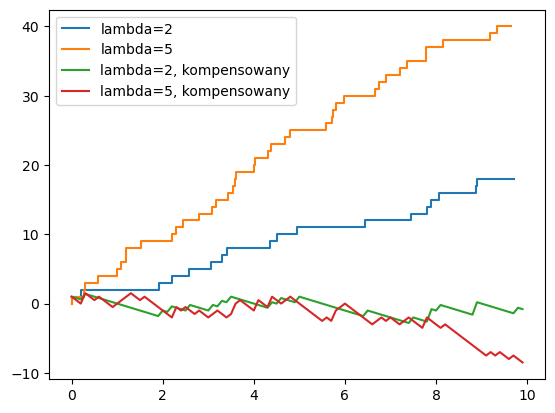

In [5]:
plt.step(P1, np.arange(0, len(P1), 1), label="lambda=2")
plt.step(P2, np.arange(0, len(P2), 1), label="lambda=5")
t = np.arange(0, 10, 0.1)
plt.plot(t, n1, label="lambda=2, kompensowany")
plt.plot(t, n2, label="lambda=5, kompensowany")
plt.legend()